In [2]:
#for reading the dataset from kaggle into google colab
import os
#import json
#from google.colab import files
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:43<00:00, 20.4MB/s]
100% 812M/812M [00:43<00:00, 19.8MB/s]


In [4]:
#defining the path to the downloaded ZIP file and the extraction directory
zip_file_path = 'dogs-vs-cats.zip'
extract_dir = 'dogs-vs-cats'

#creating the extraction directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

#extracting the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Dataset extracted to {extract_dir}')

Dataset extracted to dogs-vs-cats


In [5]:
#list files in the dataset directory
for root, dirs, files in os.walk(extract_dir):
    print(f'Found {len(files)} files in {root}')

#list files in the extracted directory
os.listdir(extract_dir)

Found 3 files in dogs-vs-cats


['test1.zip', 'train.zip', 'sampleSubmission.csv']

In [6]:
def load_image(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #converting to RGB
    return img

In [7]:
#contents of the directory where the actual images should be
train_dir = os.path.join('dogs-vs-cats', 'train', 'train')
for root, dirs, files in os.walk(train_dir):
    print(f'Root: {root}')
    print(f'Dirs: {dirs}')
    print(f'Files: {files}')

In [44]:
#defining paths for the zip files and extraction directories
train_zip_path = 'dogs-vs-cats/train.zip'
test_zip_path = 'dogs-vs-cats/test1.zip'
train_extract_dir = 'dogs-vs-cats/train'
test_extract_dir = 'dogs-vs-cats/test1'

#creating extraction directories if they don't exist
os.makedirs(train_extract_dir, exist_ok=True)
os.makedirs(test_extract_dir, exist_ok=True)

#unzipping the training data
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_extract_dir)

#unzipping the test data
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_dir)

print("Files extracted successfully.")

#verifying the extraction and set the correct paths
train_dir = os.path.join(train_extract_dir, 'train')  #adjusting for the actual structure
print("Listing files in the train directory to verify:")
for root, dirs, files in os.walk(train_dir):
    print(f'Root: {root}')
    print(f'Dirs: {dirs}')
    print(f'Files: {files[:10]}')  #printing first 10 files for brevity
    break

Files extracted successfully.
Listing files in the train directory to verify:
Root: dogs-vs-cats/train/train
Dirs: []
Files: ['cat.7511.jpg', 'dog.9832.jpg', 'dog.8508.jpg', 'dog.3808.jpg', 'cat.613.jpg', 'cat.604.jpg', 'cat.898.jpg', 'dog.2558.jpg', 'cat.12288.jpg', 'cat.4793.jpg']


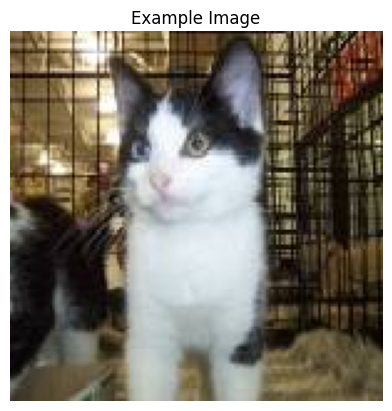

In [45]:
#defining a function to load and display an image using PIL
def load_image_pil(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None
    img = Image.open(image_path)
    return img

#defining the correct path for an image file
example_image_path = os.path.join(train_dir, 'cat.1000.jpg')  #using filename from the directory

#loading and displaying an image
example_image = load_image_pil(example_image_path)
if example_image is not None:
    plt.imshow(example_image)
    plt.title('Example Image')
    plt.axis('off')
    plt.show()
else:
    print("Image could not be loaded.")

In [47]:
test_files = os.listdir(test_extract_dir)
print(f"Files in the test directory: {test_files[:10]}")

Files in the test directory: ['test1']


In [48]:
test_subdir = os.path.join(test_extract_dir, 'test1')

#some files in the test subdirectory
test_files = os.listdir(test_subdir)
print(f"Files in the test subdirectory: {test_files[:10]}")

Files in the test subdirectory: ['6625.jpg', '9658.jpg', '7023.jpg', '5105.jpg', '3837.jpg', '2244.jpg', '10610.jpg', '3539.jpg', '7880.jpg', '10028.jpg']


Displaying image: dogs-vs-cats/test1/test1/6625.jpg


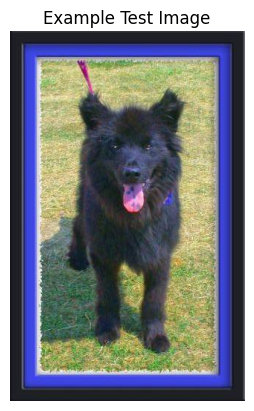

In [49]:
def load_image_pil(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None
    img = Image.open(image_path)
    return img

#using one of the listed files to define the path
if test_files:
    example_test_image_path = os.path.join(test_subdir, test_files[0])  #the first file from the list
    print(f"Displaying image: {example_test_image_path}")

    #attempt to load and display an image from the test set
    example_test_image = load_image_pil(example_test_image_path)
    if example_test_image is not None:
        plt.imshow(example_test_image)
        plt.title('Example Test Image')
        plt.axis('off')
        plt.show()
    else:
        print("Image could not be loaded.")
else:
    print("No files found in the test subdirectory.")

In [36]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import random
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [38]:
train_dir = os.path.join(train_extract_dir, 'train')

In [39]:
#defining constants
image_size = 64
num_samples_per_class = 6000

In [51]:
def load_data(folder, sample_count=None, label_filter=None):
    images = []
    labels = []
    filenames = []

    #a list of all filenames in the directory
    all_filenames = os.listdir(folder)
    random.shuffle(all_filenames)  #shuffle filenames

    cats_loaded = 0
    dogs_loaded = 0
    for filename in all_filenames:
        if 'cat' in filename:
            if cats_loaded >= num_samples_per_class:
                continue
            label = 0
            cats_loaded += 1
        elif 'dog' in filename:
            if dogs_loaded >= num_samples_per_class:
                continue
            label = 1
            dogs_loaded += 1
        else:
            continue

        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #converting to grayscale
        images.append(img)
        labels.append(label)
        filenames.append(filename)

        #stop if both classes have enough samples
        if cats_loaded >= num_samples_per_class and dogs_loaded >= num_samples_per_class:
            break

    images = np.array(images)
    labels = np.array(labels)

    #return a sample for visualization 
    if sample_count is not None:
        indices = np.random.choice(len(images), sample_count, replace=False)
        return images[indices], labels[indices]

    return images, labels, filenames

In [52]:
train_images, train_labels, filenames = load_data(train_dir)

In [53]:
train_images = train_images.reshape(train_images.shape[0], image_size, image_size, 1)
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, 2)

In [54]:
#checking unique classes in the labels
unique_classes = np.unique(train_labels)
print(f'Unique classes in the training labels: {unique_classes}')

Unique classes in the training labels: [0. 1.]


In [55]:
x_train, x_val, y_train, y_val, train_filenames, val_filenames = train_test_split(train_images, train_labels, filenames, test_size=0.2, random_state=42)

In [56]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
#training the CNN model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
300/300 [==============================] - 10s 9ms/step - loss: 0.6612 - accuracy: 0.6060 - val_loss: 0.6297 - val_accuracy: 0.6517
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.5747 - accuracy: 0.6977 - val_loss: 0.5178 - val_accuracy: 0.7558
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.5110 - accuracy: 0.7516 - val_loss: 0.5259 - val_accuracy: 0.7421
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4434 - accuracy: 0.7949 - val_loss: 0.4476 - val_accuracy: 0.7862
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3940 - accuracy: 0.8238 - val_loss: 0.4304 - val_accuracy: 0.8012
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3449 - accuracy: 0.8499 - val_loss: 0.4913 - val_accuracy: 0.7633
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2895 - accuracy: 0.8783 - val_loss: 0.4522 - val_accuracy: 0.8108
Epoch

In [58]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

75/75 [==============================] - 1s 7ms/step - loss: 0.5262 - accuracy: 0.8025
Validation Accuracy: 0.80


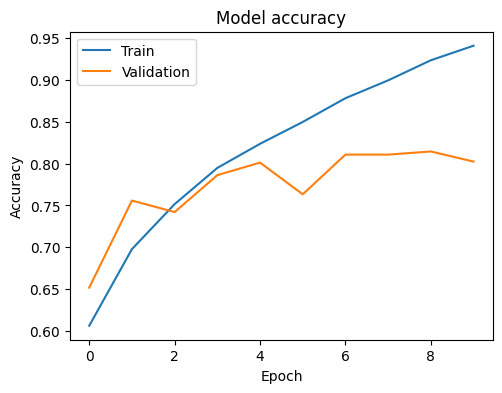

In [59]:
#plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

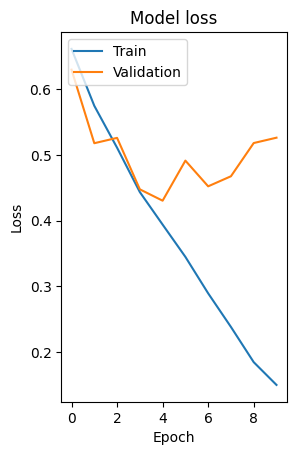

In [60]:
#plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
def load_test_data(folder):
    images = []
    filenames = []

    all_filenames = os.listdir(folder)
    for filename in all_filenames:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #grayscale
            images.append(img)
            filenames.append(filename)

    images = np.array(images)
    return images, filenames

In [63]:
#load and preprocess test images
test_images, test_filenames = load_test_data(test_subdir)
test_images = test_images.reshape(test_images.shape[0], image_size, image_size, 1)
test_images = test_images.astype('float32') / 255.0

In [64]:
#predicting on test data
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

391/391 [==============================] - 2s 4ms/step


In [65]:
#dataFrame with filenames and predicted labels
test_results = pd.DataFrame({
    'id': test_filenames,
    'label': test_predictions
})
print(test_results.head())

         id  label
0  6625.jpg      1
1  9658.jpg      0
2  7023.jpg      0
3  5105.jpg      0
4  3837.jpg      1


In [66]:
#function to manually test an image
def test_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #converting to grayscale
    img = img.astype('float32') / 255.0
    img = img.reshape(1, image_size, image_size, 1)
    prediction = model.predict(img)
    label = 'Dog' if np.argmax(prediction) == 1 else 'Cat'

    #display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img.reshape(image_size, image_size), cmap='gray')
    plt.title(f'Predicted Label: {label}')
    plt.axis('off')
    plt.show()

    return label

1/1 [==============================] - 0s 50ms/step


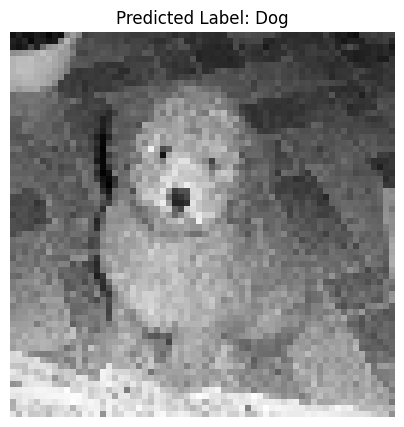

The predicted label for the selected image is: Dog


In [69]:
#testing an image manually
test_image_path = os.path.join(test_subdir, test_files[164])  #the first file from the test list
predicted_label = test_image(test_image_path)
print(f'The predicted label for the selected image is: {predicted_label}')

1/1 [==============================] - 0s 18ms/step


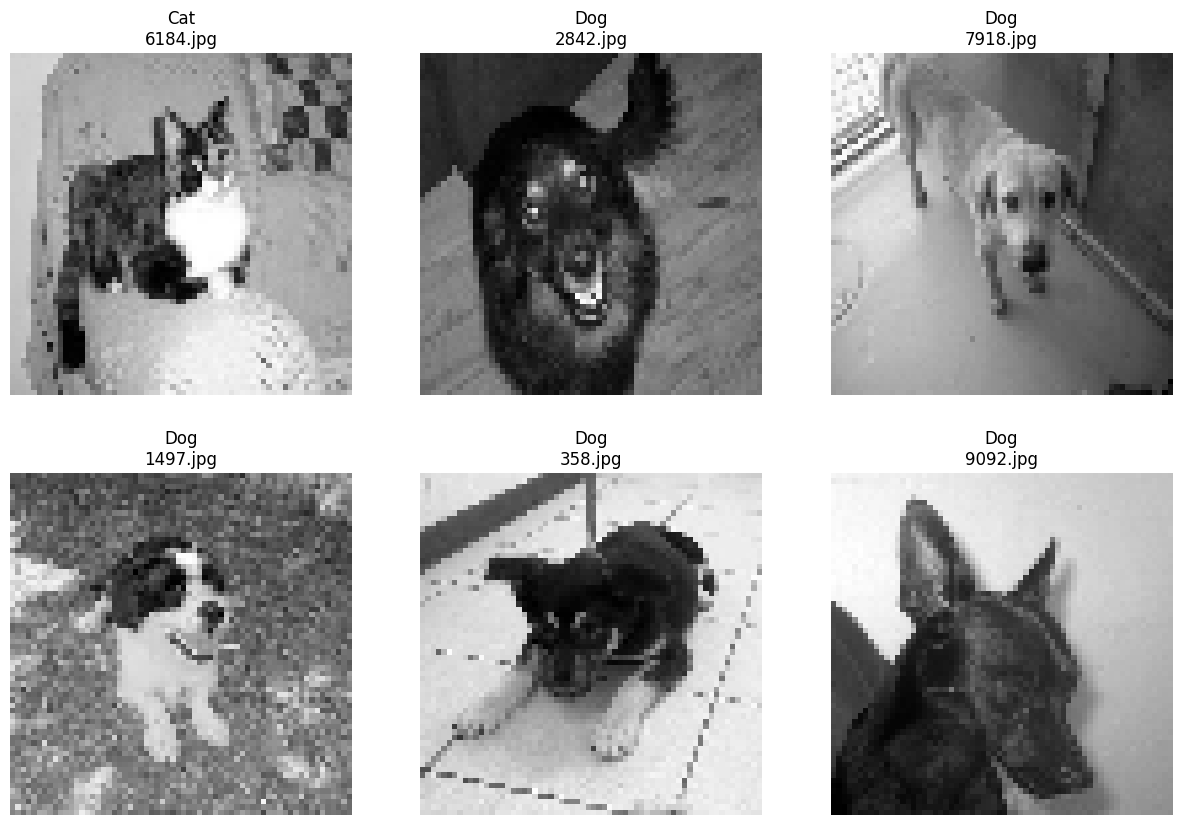

In [71]:
#manually test and display multiple images
def display_random_test_images(test_images, test_filenames, num_images=6):
    indices = np.random.choice(len(test_images), num_images, replace=False)
    plt.figure(figsize=(15, 10))

    for i, idx in enumerate(indices):
        img = test_images[idx].squeeze()  #removing channel dimension
        filename = test_filenames[idx]
        prediction = model.predict(np.expand_dims(test_images[idx], axis=0))
        label = 'Dog' if np.argmax(prediction) == 1 else 'Cat'

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{label}\n{filename}')
        plt.axis('off')

    plt.show()

#printing 6 random test images
display_random_test_images(test_images, test_filenames, num_images=6)